In [1]:
import numpy as np
import pandas as pd

# Fpr ROC curves
from sklearn.metrics import roc_curve, auc

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
reg=pd.read_excel(r"C:\Users\Client\OneDrive - Queen Mary, University of London\PhD Shared folder\SomaScan Results\Corelation data.xlsx", sheet_name='COX data')
reg.head()

,Group ID,Study ID,Event Name,Gender,MND type,Site of onset,Motor neurone-dominant features from onset,Date of birth,Sample Date,Age at visit,...,C5,TPP2,C3,TSC22D1,PLEC,TF,BCL2L1,EIF4A3,CHGB,NEFH
0,ALS F1,UCH00136,Index-Case Baseline,female,ALS,"Bulbar, UL",NaN,1935-09-18,2014-09-25,79.0,...,15.364966,11.293299,12.450258,10.493055,8.532551,18.095873,11.726218,8.915282,8.866352,8.518063
1,ALS F10,UCH00153,Index-Case Baseline,male,ALS,Bulbar,NaN,1941-10-18,2015-08-13,73.0,...,15.366326,11.280191,12.980086,10.497453,8.492654,18.134419,10.533330,8.873136,9.021813,9.932953
2,ALS F11,UCH00093,Index-Case Baseline,male,ALS,LL,NaN,1937-01-27,2013-12-19,76.0,...,15.290541,9.816824,12.278014,10.048078,9.548629,17.905072,10.316395,8.997462,9.239360,8.434628
3,ALS F12,UCH00142,Index-Case Baseline,male,ALS,LL,NaN,1946-06-11,2015-01-29,68.0,...,15.750880,10.727155,13.148445,10.454608,8.628263,18.158875,11.030667,8.862327,9.508389,8.939873
4,ALS F13,BUH00447,Index-Case Baseline,male,ALS,Bulbar,PBP - Progressive Bulbar Palsy,1937-04-18,2017-06-28,80.0,...,15.224337,10.149620,11.866545,10.509775,8.776104,17.947340,10.927111,8.867279,9.395534,8.514122


In [3]:
# Standardize column names
reg.columns = reg.columns.str.strip().str.lower().str.replace(" ", "_")


In [5]:
print(reg.columns.tolist())


['group_id', 'study_id', 'event_name', 'gender', 'mnd_type', 'site_of_onset', 'motor_neurone-dominant_features_from_onset', 'date_of_birth', 'sample_date', 'age_at_visit', 'date_first_weakness_noticed', 'date_of_diagnosis', 'diagnostic_delay', 'age_at_onset', 'time_from_onset', 'time_from_diagnosis', 'alsfrsr', 'progression_rate_at_baseline', 'rip_date', 'rip_age', 'survival', 'outcome_1-rip', 'features_of_fronto-temporal_involvement', 'als_diagnostic_classification', 'on_riluzole', 'tnr', 'apol1', 'nudt16l1', 'islr2', 'gstp1', 'nrxn3', 'apoa4', 'dazap1', 'ehd2', 'c5', 'tpp2', 'c3', 'tsc22d1', 'plec', 'tf', 'bcl2l1', 'eif4a3', 'chgb', 'nefh']


In [6]:
# Use your dataframe (reg)
roc = reg.copy()

# Binary labels: 1 = ALS, 0 = HC
roc['y'] = roc['group_id'].str.upper().str.contains("ALS").astype(int)



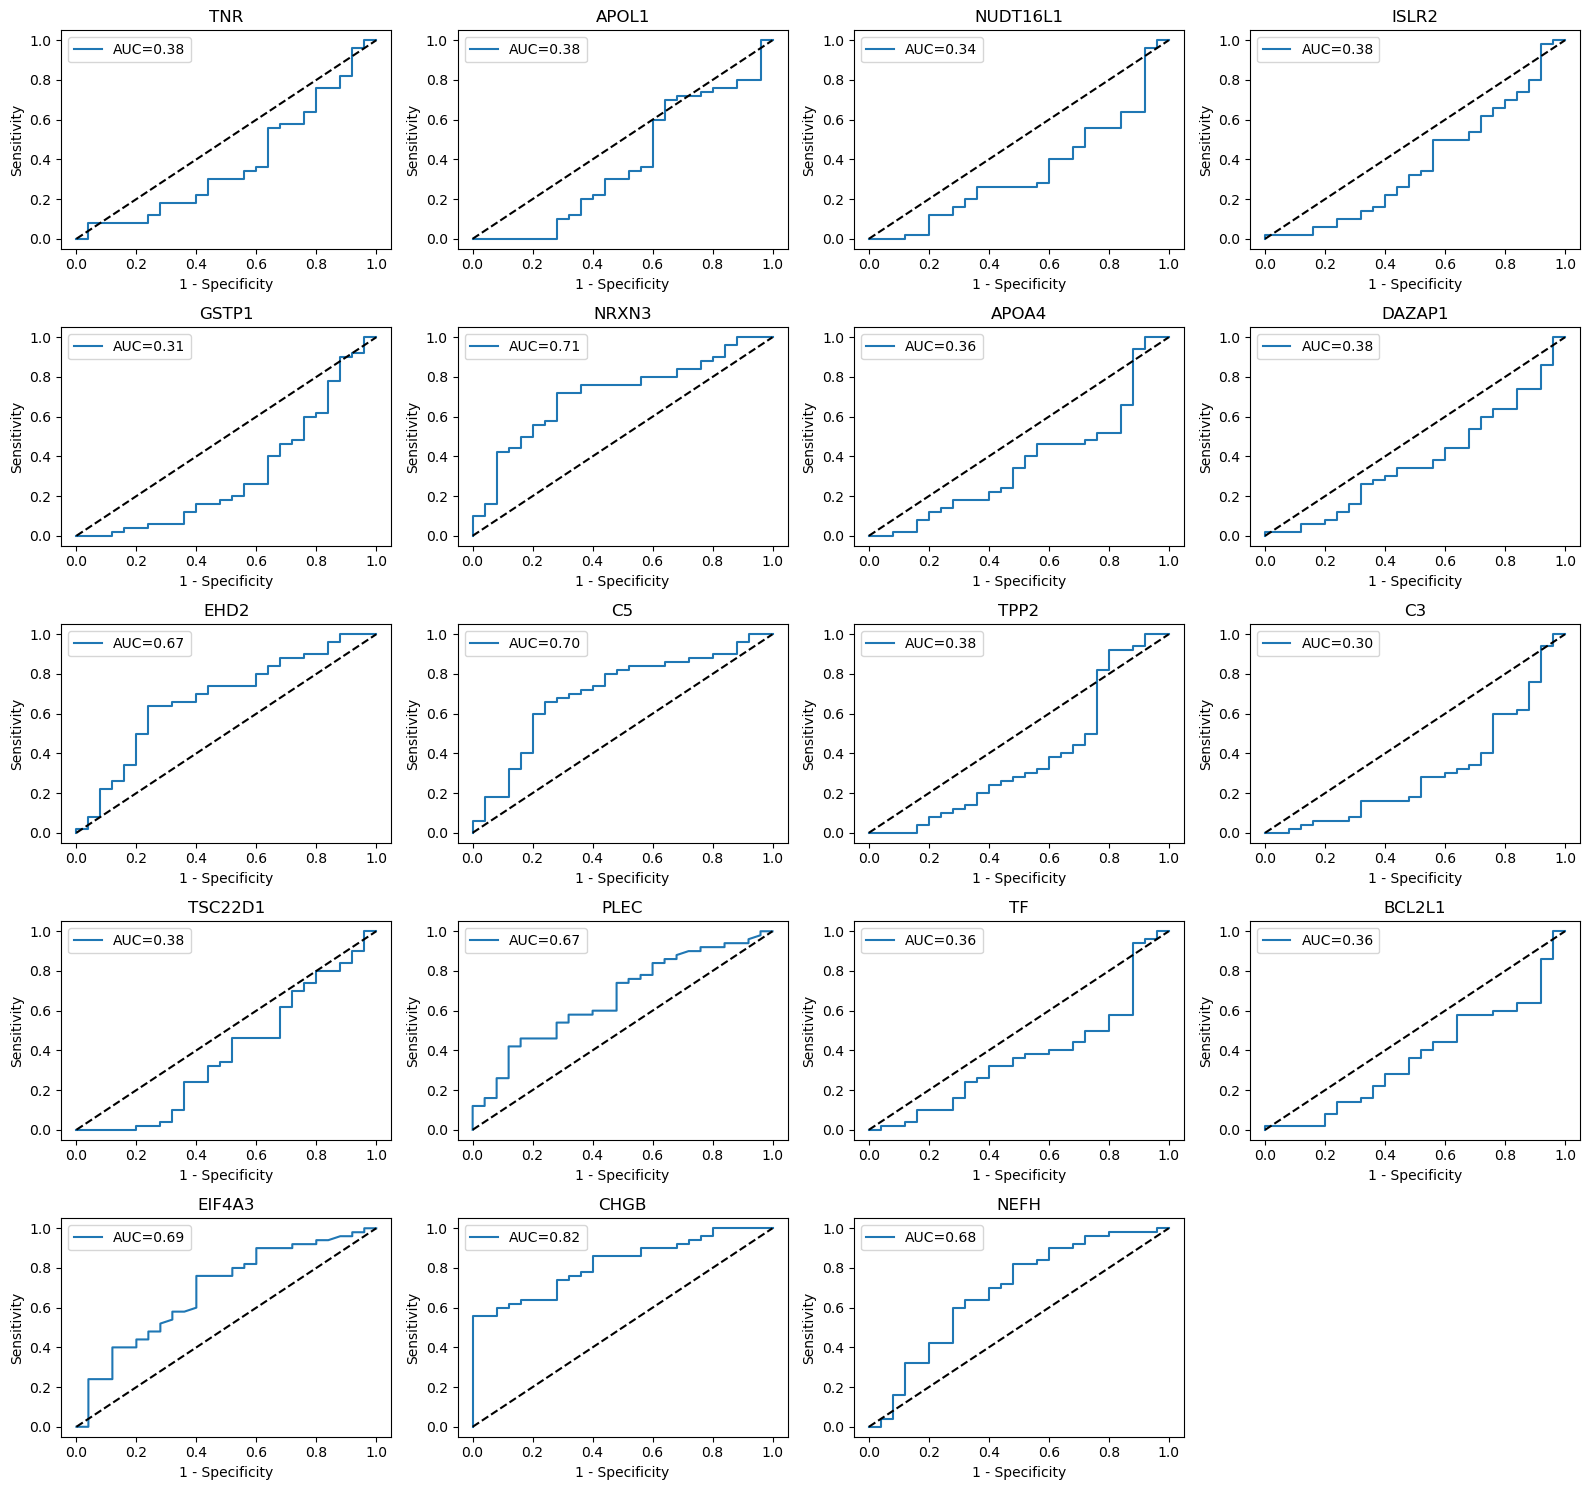

In [7]:
# List of your 19 significant proteins
proteins = ['tnr','apol1','nudt16l1','islr2','gstp1','nrxn3','apoa4','dazap1',
            'ehd2','c5','tpp2','c3','tsc22d1','plec','tf','bcl2l1','eif4a3','chgb','nefh']

# Only keep proteins that exist in your dataframe
proteins = [p for p in proteins if p in roc.columns]

# Grid layout
ncols = 4
nrows = int(np.ceil(len(proteins)/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 3*nrows))

for i, protein in enumerate(proteins):
    ax = axes[i//ncols, i%ncols]
    scores = pd.to_numeric(roc[protein], errors='coerce').fillna(0).values
    fpr, tpr, _ = roc_curve(roc['y'], scores)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'AUC={roc_auc:.2f}')
    ax.plot([0,1],[0,1],'k--')
    ax.set_title(protein.upper())
    ax.set_xlabel('1 - Specificity')
    ax.set_ylabel('Sensitivity')
    ax.legend()
    
# Hide unused subplots
for j in range(len(proteins), nrows*ncols):
    fig.delaxes(axes[j//ncols, j%ncols])

plt.tight_layout()
plt.show()

   Biomarker     AUC
17      CHGB  0.8200
5      NRXN3  0.7128
9         C5  0.7048
16    EIF4A3  0.6868
18      NEFH  0.6808
8       EHD2  0.6736
13      PLEC  0.6680
12   TSC22D1  0.3824
1      APOL1  0.3816
0        TNR  0.3816
7     DAZAP1  0.3768
10      TPP2  0.3760
3      ISLR2  0.3752
15    BCL2L1  0.3648
14        TF  0.3640
6      APOA4  0.3632
2   NUDT16L1  0.3360
4      GSTP1  0.3112
11        C3  0.3032


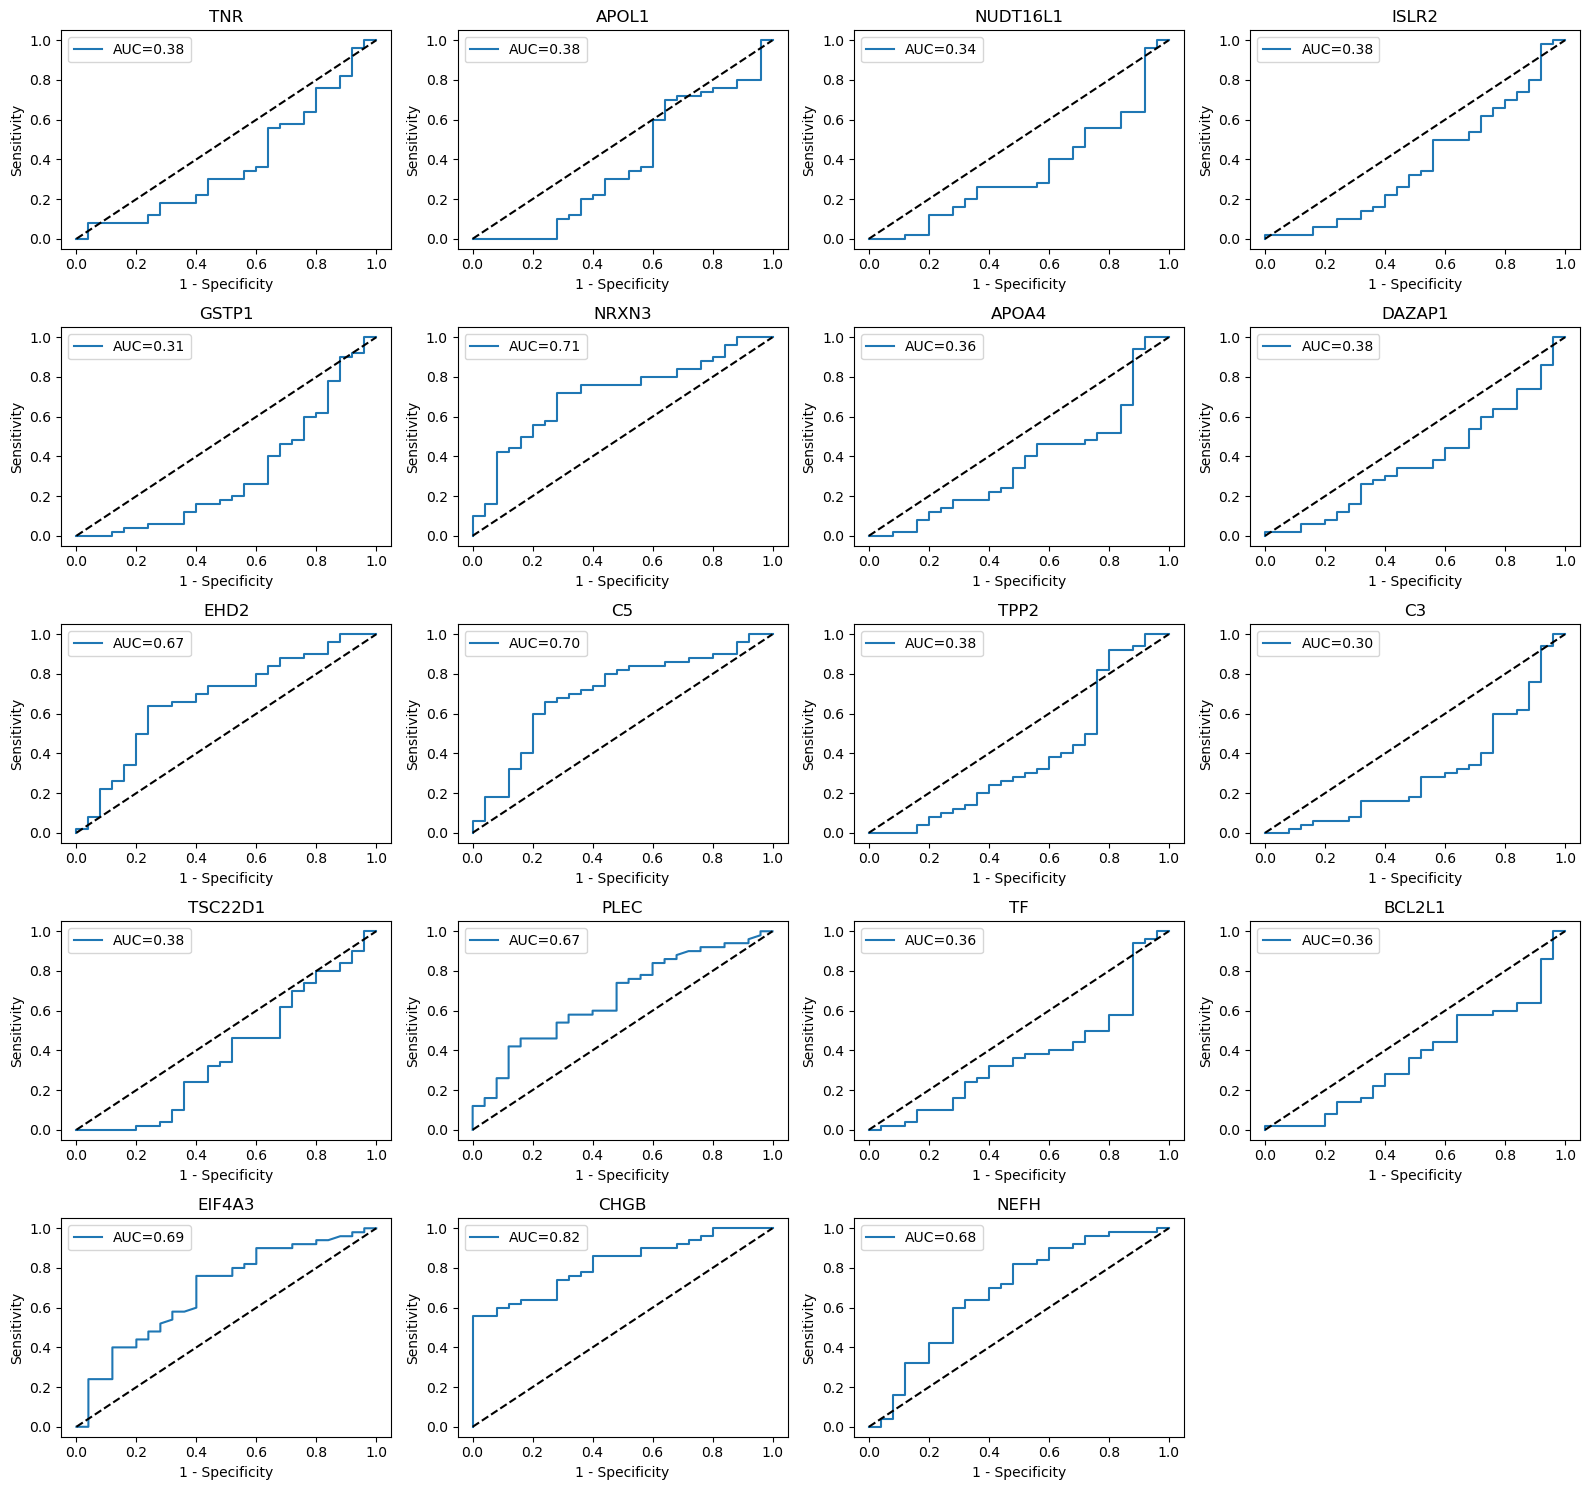

In [8]:
# Collect AUCs
auc_results = []
for protein in proteins:
    scores = pd.to_numeric(roc[protein], errors='coerce').fillna(0).values
    fpr, tpr, _ = roc_curve(roc['y'], scores)
    roc_auc = auc(fpr, tpr)
    auc_results.append((protein.upper(), roc_auc))

# Convert to DataFrame
auc_df = pd.DataFrame(auc_results, columns=["Biomarker","AUC"]).sort_values("AUC", ascending=False)
print(auc_df)

# Plot ROC curves in grid
ncols = 4
nrows = int(np.ceil(len(proteins)/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 3*nrows))

for i, protein in enumerate(proteins):
    ax = axes[i//ncols, i%ncols]
    scores = pd.to_numeric(roc[protein], errors='coerce').fillna(0).values
    fpr, tpr, _ = roc_curve(roc['y'], scores)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'AUC={roc_auc:.2f}')
    ax.plot([0,1],[0,1],'k--')
    ax.set_title(protein.upper())
    ax.set_xlabel('1 - Specificity')
    ax.set_ylabel('Sensitivity')
    ax.legend()

# Hide unused subplots
for j in range(len(proteins), nrows*ncols):
    fig.delaxes(axes[j//ncols, j%ncols])

plt.tight_layout()
plt.show()

In [9]:
#Filter biomarkers with AUC > 0.5
filtered_auc_df = auc_df[auc_df["AUC"] > 0.5].sort_values("AUC", ascending=False)

print(filtered_auc_df)

   Biomarker     AUC
17      CHGB  0.8200
5      NRXN3  0.7128
9         C5  0.7048
16    EIF4A3  0.6868
18      NEFH  0.6808
8       EHD2  0.6736
13      PLEC  0.6680


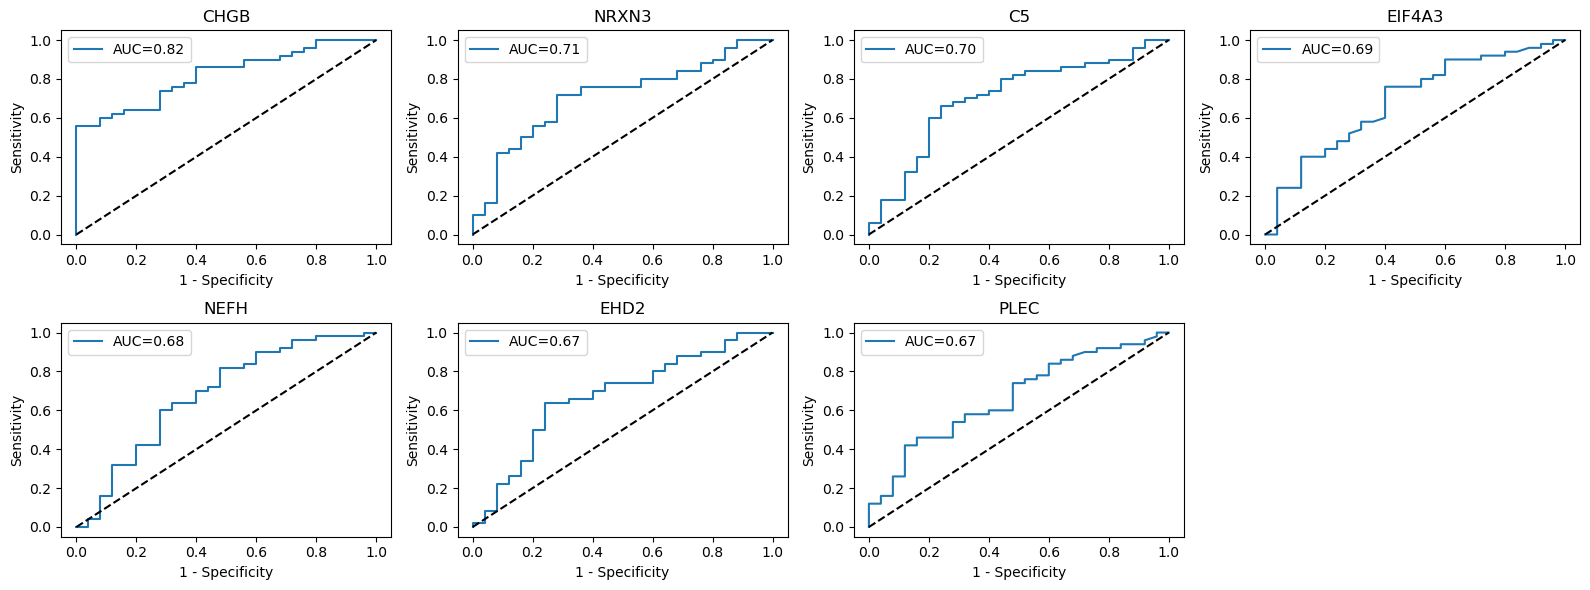

In [10]:
# Select proteins with AUC > 0.5
selected_proteins = filtered_auc_df["Biomarker"].str.lower().tolist()  # match lowercase names in roc

ncols = 4
nrows = int(np.ceil(len(selected_proteins)/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 3*nrows))

for i, protein in enumerate(selected_proteins):
    ax = axes[i//ncols, i%ncols]
    scores = pd.to_numeric(roc[protein], errors='coerce').fillna(0).values
    fpr, tpr, _ = roc_curve(roc['y'], scores)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'AUC={roc_auc:.2f}')
    ax.plot([0,1],[0,1],'k--')
    ax.set_title(protein.upper())
    ax.set_xlabel('1 - Specificity')
    ax.set_ylabel('Sensitivity')
    ax.legend()

# Hide unused subplots
for j in range(len(selected_proteins), nrows*ncols):
    fig.delaxes(axes[j//ncols, j%ncols])

plt.tight_layout()
plt.show()

In [11]:
selected_proteins

['chgb', 'nrxn3', 'c5', 'eif4a3', 'nefh', 'ehd2', 'plec']

In [16]:
# === Define metadata columns (not proteins) ===
metadata_cols = [
    "group_id","study_id","event_name","gender","mnd_type","site_of_onset",
    "motor_neurone-dominant_features_from_onset","date_of_birth","sample_date",
    "age_at_visit","date_first_weakness_noticed","date_of_diagnosis",
    "diagnostic_delay","age_at_onset","time_from_onset","time_from_diagnosis",
    "alsfrsr","progression_rate_at_baseline","rip_date","rip_age","survival",
    "outcome_1-rip","features_of_fronto-temporal_involvement",
    "als_diagnostic_classification","on_riluzole","y"
]

#=== Collect protein columns ===
proteins = [c for c in roc.columns if c not in metadata_cols]

# === Compute ROC AUC for each protein ===
auc_results = []
for protein in proteins:
    scores = pd.to_numeric(roc[protein], errors="coerce").fillna(0).values
    fpr, tpr, _ = roc_curve(roc["y"], scores)
    roc_auc = auc(fpr, tpr)
    auc_results.append((protein.upper(), roc_auc))

# === Convert to DataFrame ===
auc_df = pd.DataFrame(auc_results, columns=["Biomarker", "AUC"]).sort_values("AUC", ascending=False)

# === Filter by threshold (AUC > 0.5) ===
auc_df_filtered = auc_df[auc_df["AUC"] > 0.5]

# === Keep all columns and rows for those proteins ===
filtered_df = roc[metadata_cols + selected_proteins]

In [17]:
# === Save results to Excel ===
filtered_df.to_excel(r"C:\Users\Client\OneDrive - Queen Mary, University of London\PhD Shared folder\SomaScan Results\Corelation data AUC filtered.xlsx", index=False)